In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.constants import c

In [2]:
!wget https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week10/lte9800-3.5.NextGen.fits.gz

--2023-10-26 15:08:09--  https://raw.githubusercontent.com/thaynecurrie/phys7943_fall2023/main/ScientificPythonNotes/_problemsets_github/week10/lte9800-3.5.NextGen.fits.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119966 (117K) [application/octet-stream]
Saving to: ‘lte9800-3.5.NextGen.fits.gz’

lte9800-3.5.NextGen 100%[===================>] 117.15K  --.-KB/s    in 0.03s   

2023-10-26 15:08:09 (3.91 MB/s) - ‘lte9800-3.5.NextGen.fits.gz’ saved [119966/119966]



# Problem 1: Project Update
##Improving N-Body Calculations

### In the Numpy Weeds
- Aligning axes for position and force calcs

### On the To-Do List
- Setting a distance limit for ignoring gravity in pairwise body interactions
- Refactor to break up large functions
- Integrating an IMF (Inital Mass Function) as the starting point for the bodies, follows peicewise power rule.


#Problem 2

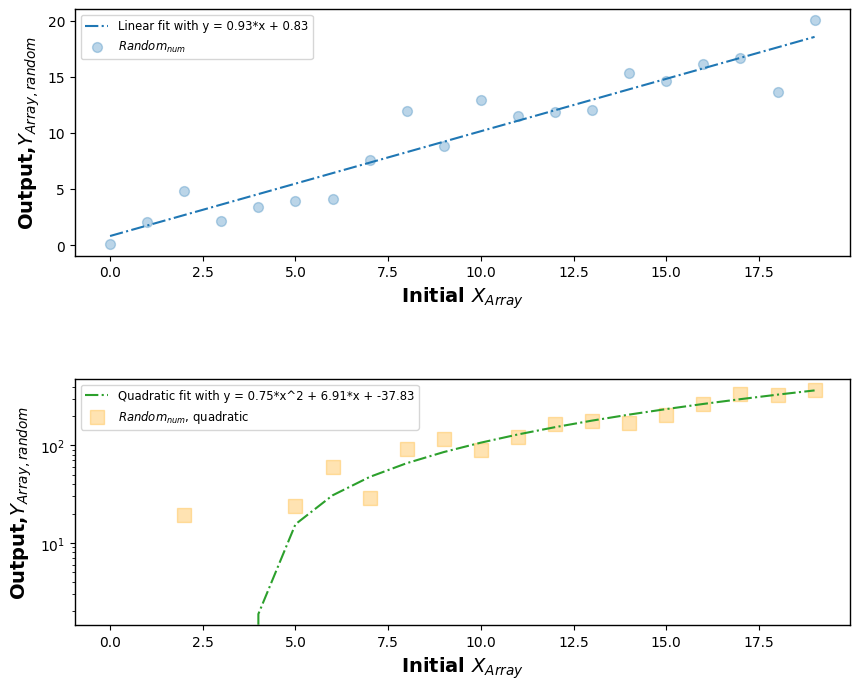

In [6]:
#tuneable params top scatter
alpha_top = 0.3
marker_size_top = 50
scaling_top_x = 'linear'
scaling_top_y = 'linear'
line_style_top = '-.'

#tuneable params bottom scatter
alpha_bottom = 0.3
marker_size_bottom = 100
scaling_bottom_x = 'linear'
scaling_bottom_y = 'log'
line_style_bottom = '-.'


#common params
label_fontsize = 'small'
axis_label_font = {'font': 'DejaVu Sans', 'size': 14, 'color': 'black', 'weight': 'bold'} #verdana giving error, not avaliable
spine_thickness = 1


#data gernerate and fit
xarray = np.arange(20)
yarray = np.arange(20) + 3 * np.random.randn(20)
a, b = np.polyfit(xarray, yarray, 1)

yarray2 = (np.arange(20)) ** 2. + 20 * np.random.randn(20)
a2, b2, c2 = np.polyfit(xarray, yarray2, 2)

poly = np.poly1d(np.polyfit(xarray, yarray2, 2))

#call to plt routine
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

#top scatter
axes[0].plot(xarray, xarray * a + b, linestyle=line_style_top, label=f'Linear fit with y = {a:.2f}*x + {b:.2f}')
axes[0].scatter(xarray, yarray, marker='o', s=marker_size_top, alpha=alpha_top, label=r'$Random_{num}$')
axes[0].set_xscale(scaling_top_x)
axes[0].set_yscale(scaling_top_y)


#bottom scatter
axes[1].plot(xarray, poly(xarray), c='tab:green', linestyle=line_style_bottom, label=f'Quadratic fit with y = {a2:.2f}*x^2 + {b2:.2f}*x + {c2:.2f}')
axes[1].scatter(xarray, yarray2, marker='s', c='orange', s=marker_size_bottom, alpha=alpha_bottom, label=r'$Random_{num}$, quadratic')
axes[1].set_xscale(scaling_bottom_x)
axes[1].set_yscale(scaling_bottom_y)


#common ax setting
for ax in axes:
    ax.legend(loc='upper left', fontsize=label_fontsize)
    ax.set_xlabel('Initial $X_{Array}$', **axis_label_font)
    ax.set_ylabel(r'Output,$Y_{Array, random}$', **axis_label_font)
    for spine in ax.spines.values():
        spine.set_linewidth(spine_thickness)

#vectorized save
plt.savefig('problem_2.pdf', format='pdf')

#refactor into dict for tuneable params before turn in

#Problem 3
1. reads in provided FITS (ew) file
2. extracts wavelength in microns and flux in native units
3. converts wavelength -> meters -> freqency using astroy c
4. plots wavelength v freqency based on my guess at photo settings
    - x and y axis are both log scaled
    - x-axis limits: 1e-1 to 1e1
    - y-axis limits: 1e-11 to 1e-6
5. adds a secondary x-axis for frequency
6. saves the plot as a pdf for vectorized photo.


In [4]:
def convert_wavelength_to_frequency(wavelength_micron):
    """
    converts wavelengt from microns to meters, then calculates freqency.
    - c (astropy import) / lamda (m) = f(hz)

    passed:
    - wavelength_micron

    Returns:
    - tuple with wavelength in meter and the freqency for the value
    """
    wavelength_meter = wavelength_micron * 1e-6
    frequency = c.value / wavelength_meter
    return wavelength_meter, frequency

#read in data model
primary_model=fits.open('./lte9800-3.5.NextGen.fits.gz')

#set header and data
phead=primary_model[0].header
primary_spec=primary_model[0].data

#extract wavelength(micron) and flux
primary_wvlh=primary_spec[0,:]
primary_flux=primary_spec[1,:]

#convert wavength to meters -> freqency
primary_wvlh_m, primary_freq = convert_wavelength_to_frequency(primary_wvlh)


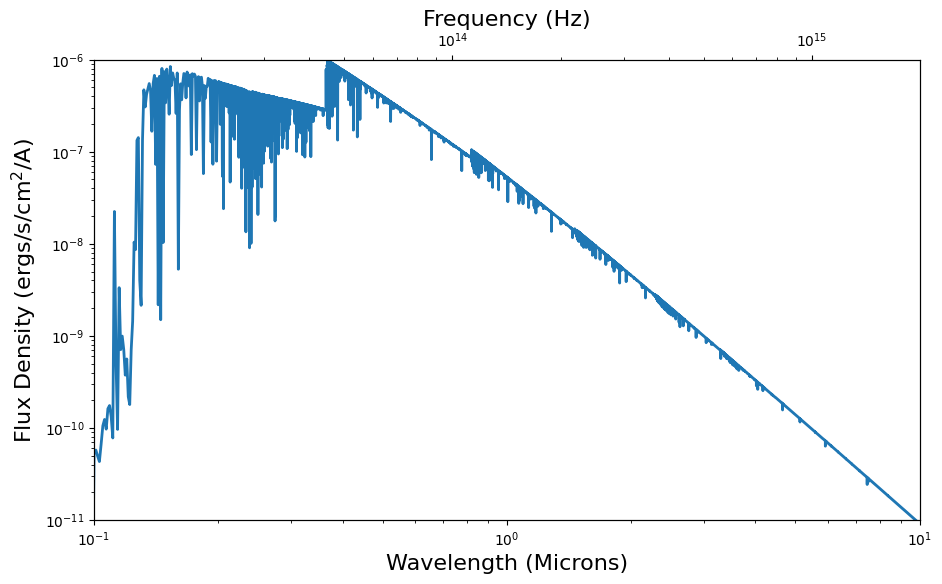

In [5]:
#plot routine, cleaned via function


def set_axis_props(ax, x_label, y_label, x_scale='log', y_scale='log'):
    """
    sets axis scale and labels.
    - ax: the axis to tweak
    - x/y_label: axis labels
    - x/y_scale: how to scale, default is 'log' based on your photo
    """
    ax.set_xscale(x_scale)
    ax.set_yscale(y_scale)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)

def plot_data(x, y):
  """
  plots data with predefined settings, dervied from photo
  - x, y: micron vs wavelength
  - set x.y.lim based on photo
  """
  plt.figure(figsize=(12, 8))
  plt.plot(x, y, '-', linewidth=2)
  set_axis_props(plt.gca(), 'Wavelength (Microns)', 'Flux Density (ergs/s/cm' + r'$^2$' + '/A)')
  plt.xlim(1e-1, 1e1)
  plt.ylim(1e-11, 1e-6)
  plt.tight_layout(pad=10.0)

def add_second_x_axis():
    """
    adds a second x-axis for frequency.
    - weird xlim to dodge unwanted markers (1e13, 1e16)
    """
    ax2 = plt.gca().twiny()
    set_axis_props(ax2, 'Frequency (Hz)', '', x_scale='log')
    ax2.set_xlim(1.01e13, 1.99e15)


#plot routine
plot_data(primary_wvlh, primary_flux) #plot primary
add_second_x_axis() #add secondary freqency axis
plt.savefig('i_hate_fits.pdf',format='pdf')